<a href="https://colab.research.google.com/github/AidanLee007/Test-Repo/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

possible research topics


*   What events affected COVID-19 cases and deaths?
*   How were different countries impacted by COVID-19?
*   What differences in regional behavior/responses impact pandemic response?
*   What differences in regional responses affected the deaths:total cases ratio?
*   What differences in regional responses affected the COVID-19 pandemic’s fatality?
    * Vaccinations.
    * Government mandates (mask requirements, gathering sizes/legality).
    * Changing regulations over time.
  






In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split

In [22]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from scipy.stats import ttest_ind

In [23]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

In [24]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [25]:
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df1 = pd.read_csv( url1)

In [26]:
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [27]:
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df2 = pd.read_csv(url2)

In [28]:
middf = pd.merge(df, df1, on=['Lat', 'Long'])
display(middf.head())

,Province/State_x,Country/Region_x,Lat,Long,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [29]:
merged_df = pd.merge(df2, middf, on=['Lat', 'Long'])
display(merged_df.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [30]:
covid1 = merged_df
covid1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [31]:
print(covid1['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'

In [32]:
df_confirmed = df.drop

In [33]:
drop = ['Diamond Princess', 'MS Zaandam', 'Summer Olympics 2020', 'Winter Olympics 2022']
covid = covid1[~covid1['Country/Region'].isin(drop)].copy()
print(covid.shape)
print(covid1.shape)

(268, 3437)
(302, 3437)


In [34]:
covid.shape

(268, 3437)

In [35]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 301
Columns: 3437 entries, Province/State to 3/9/23_y
dtypes: float64(2), int64(3429), object(6)
memory usage: 7.0+ MB


In [36]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed1 = pd.read_csv(url)

drop = ['Diamond Princess', 'MS Zaandam', 'Summer Olympics 2020', 'Winter Olympics 2022']
df_confirmed = df_confirmed1[~df_confirmed1['Country/Region'].isin(drop)].copy()

id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_cols = df_confirmed.columns.difference(id_vars)

covid_melted = df_confirmed.melt(
    id_vars=id_vars,
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

#Date to datetime
covid_melted['Date'] = pd.to_datetime(covid_melted['Date'])

covid_grouped = covid_melted.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

display(covid_grouped.head())

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0


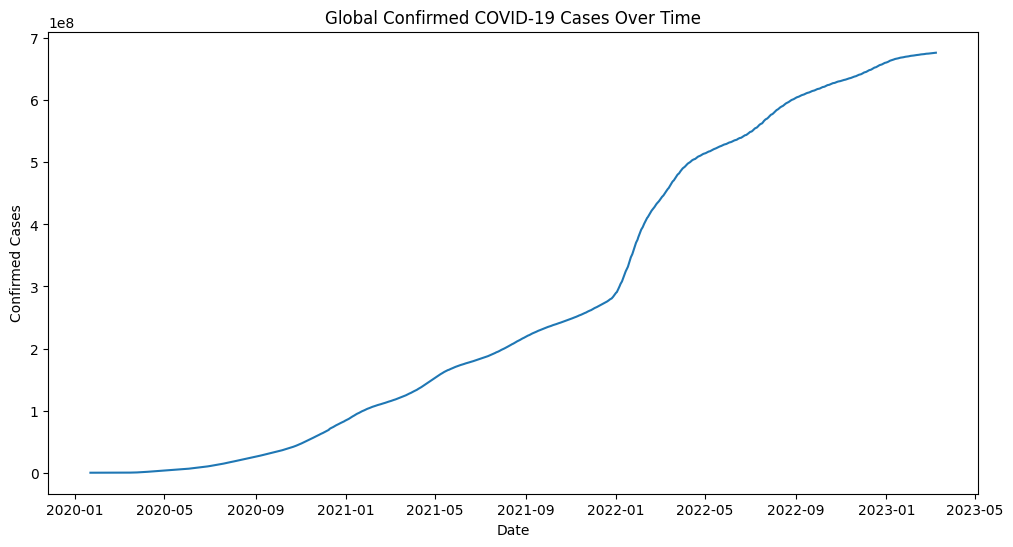

In [37]:
#confirmed covid globally
global_cases = covid_melted.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_cases, x='Date', y='Confirmed')
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

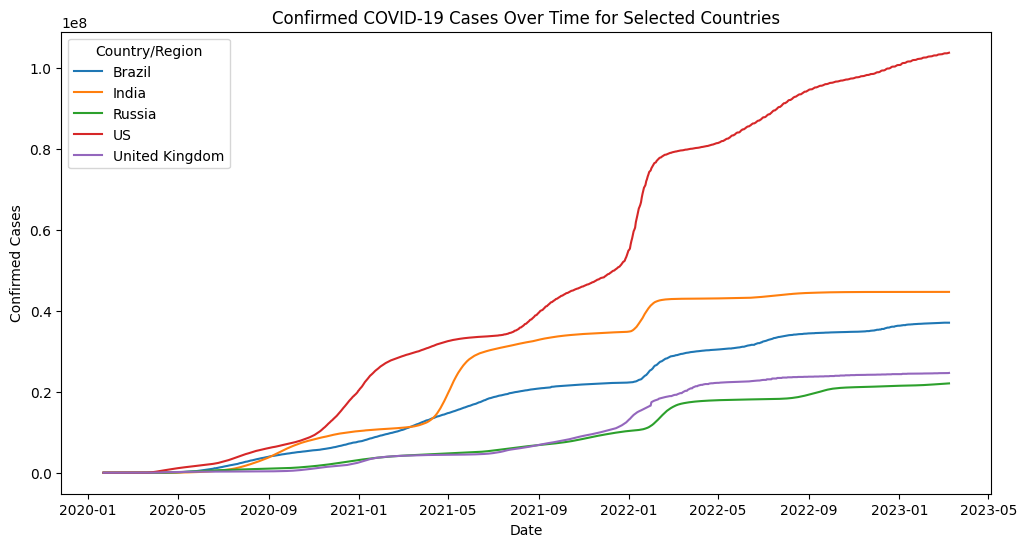

In [38]:
#confirmed cases by country
selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']
selected_covid = covid_grouped[covid_grouped['Country/Region'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_covid, x='Date', y='Confirmed', hue='Country/Region')
plt.title('Confirmed COVID-19 Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

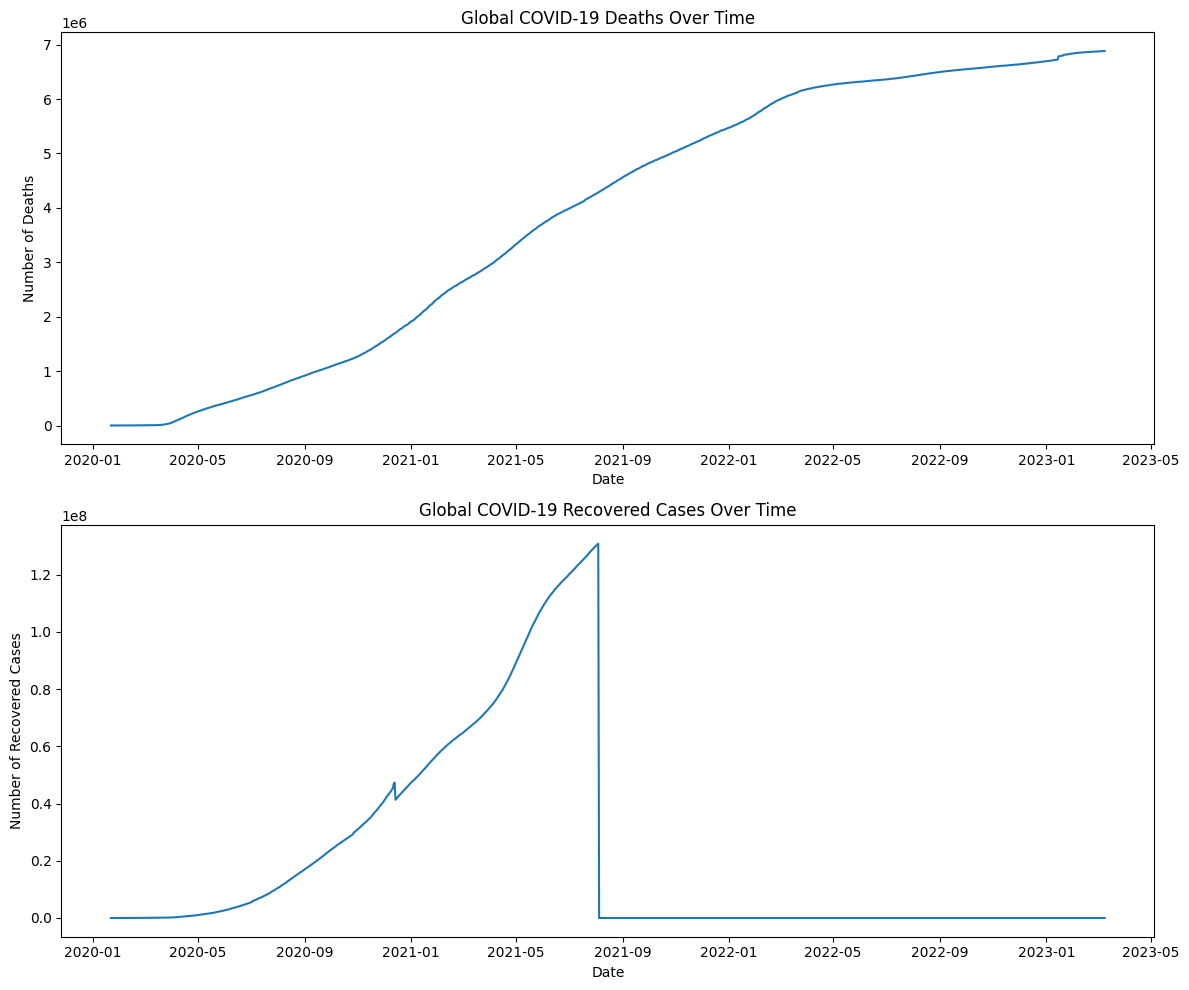

In [39]:
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = pd.read_csv(url_deaths)

url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(url_recovered)

id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_cols_deaths = df_deaths.columns.difference(id_vars)
deaths_melted = df_deaths.melt(
    id_vars=id_vars,
    value_vars=date_cols_deaths,
    var_name='Date',
    value_name='Deaths'
)

date_cols_recovered = df_recovered.columns.difference(id_vars)
recovered_melted = df_recovered.melt(
    id_vars=id_vars,
    value_vars=date_cols_recovered,
    var_name='Date',
    value_name='Recovered'
)

#Date to datetime
deaths_melted['Date'] = pd.to_datetime(deaths_melted['Date'])
recovered_melted['Date'] = pd.to_datetime(recovered_melted['Date'])

global_deaths = deaths_melted.groupby('Date')['Deaths'].sum().reset_index()
global_recovered = recovered_melted.groupby('Date')['Recovered'].sum().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#global deaths
sns.lineplot(data=global_deaths, x='Date', y='Deaths', ax=axes[0])
axes[0].set_title('Global COVID-19 Deaths Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Deaths')

#global recovered
sns.lineplot(data=global_recovered, x='Date', y='Recovered', ax=axes[1])
axes[1].set_title('Global COVID-19 Recovered Cases Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Recovered Cases')

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (21717,).

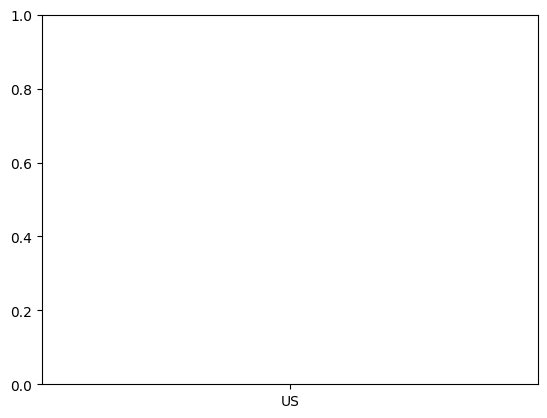

In [40]:
selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']

ratio = pd.merge(covid_melted, deaths_melted, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
ratio['Death Ratio'] = ratio['Deaths']/ratio['Confirmed']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]
#sns.lineplot(data = selected_countries)
plt.bar(selected_countries, selected_ratio['Death Ratio'])


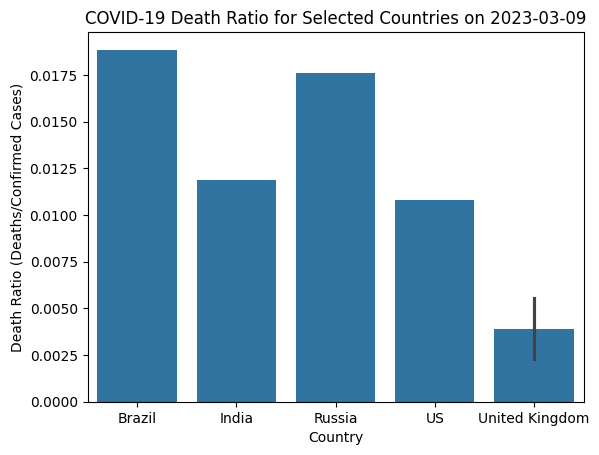

In [41]:
ratio = pd.merge(covid_melted, deaths_melted, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
ratio['Death Ratio'] = ratio['Deaths']/ratio['Confirmed']

selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]

specific_date = '2023-03-09'
selected_ratio_specific_date = selected_ratio[selected_ratio['Date'] == specific_date]

sns.barplot(data=selected_ratio_specific_date, x='Country/Region', y='Death Ratio')
plt.title(f'COVID-19 Death Ratio for Selected Countries on {specific_date}')
plt.xlabel('Country')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.show()

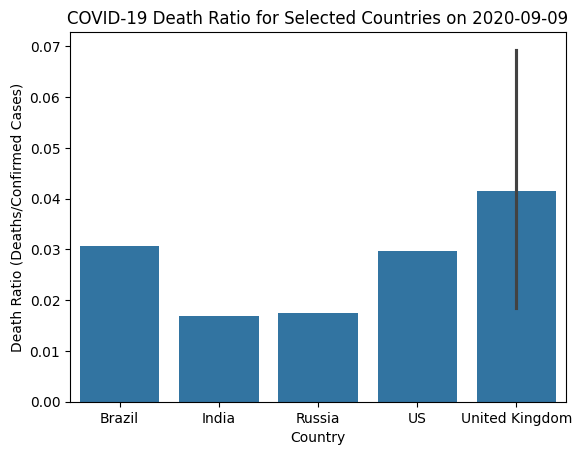

In [42]:
ratio = pd.merge(covid_melted, deaths_melted, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
ratio['Death Ratio'] = ratio['Deaths']/ratio['Confirmed']

selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]

specific_date = '2020-09-09'
selected_ratio_specific_date = selected_ratio[selected_ratio['Date'] == specific_date]

sns.barplot(data=selected_ratio_specific_date, x='Country/Region', y='Death Ratio')
plt.title(f'COVID-19 Death Ratio for Selected Countries on {specific_date}')
plt.xlabel('Country')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.show()

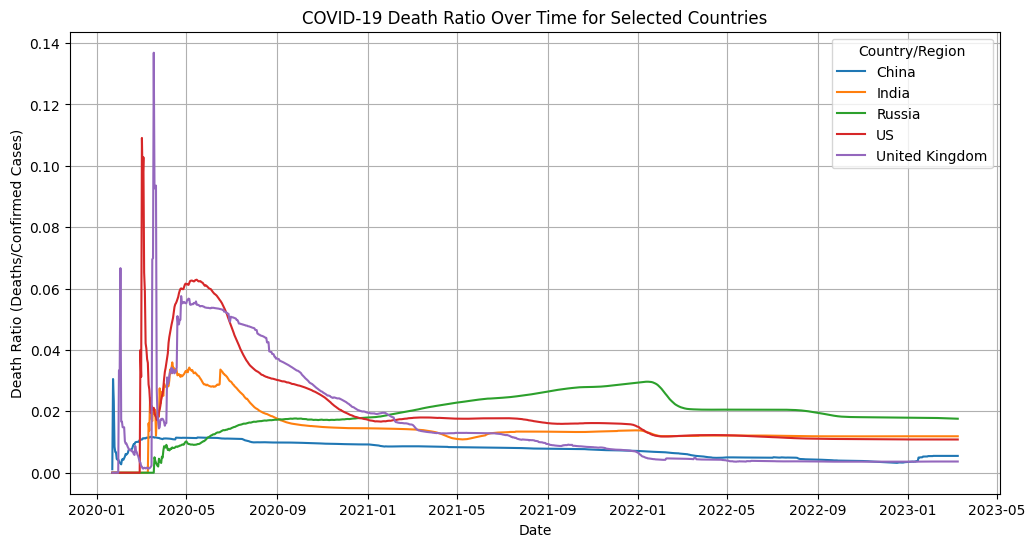

In [43]:
ratio['Death Ratio'] = ratio['Death Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
selected_countries = ['US', 'India', 'China', 'United Kingdom', 'Russia']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_ratio, x='Date', y='Death Ratio', hue='Country/Region', errorbar = None)
plt.title('COVID-19 Death Ratio Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.grid(True)
plt.show()

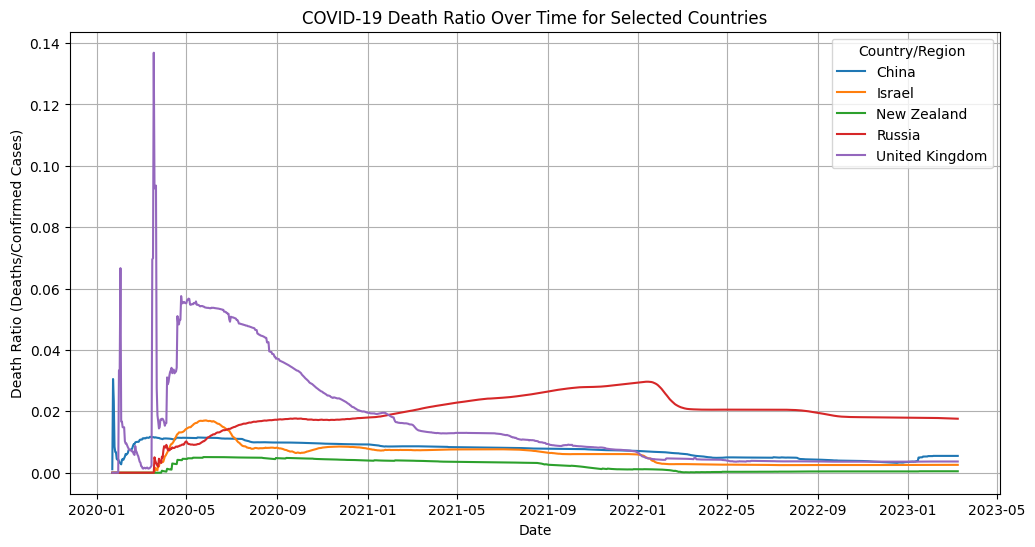

In [44]:
ratio['Death Ratio'] = ratio['Death Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
selected_countries1 = ['Israel', 'New Zealand', 'China', 'United Kingdom', 'Russia']
selected_ratio1 = ratio[ratio['Country/Region'].isin(selected_countries1)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_ratio1, x='Date', y='Death Ratio', hue='Country/Region', errorbar = None)
plt.title('COVID-19 Death Ratio Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.grid(True)
plt.show()

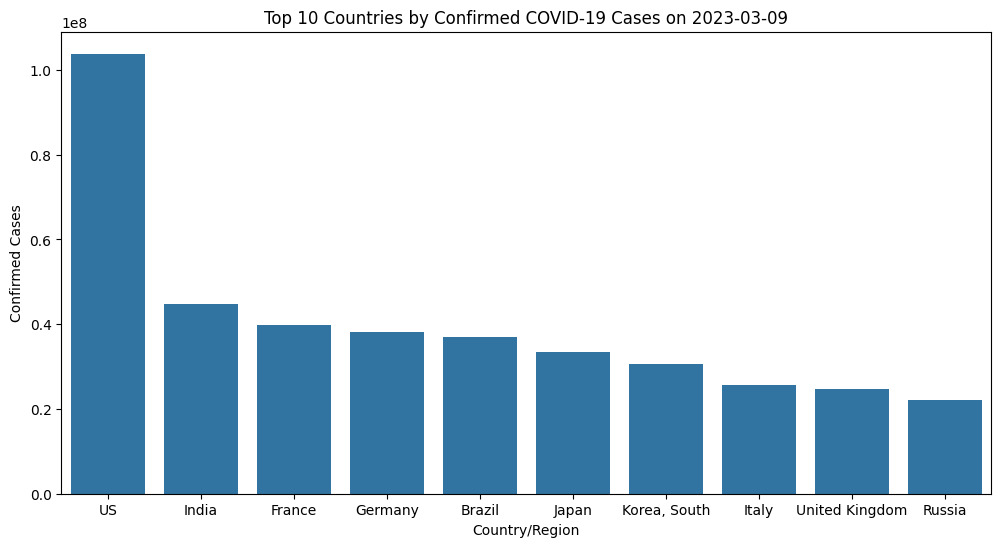

In [45]:
#top countries
last_date = covid_grouped['Date'].max()

last_date_data = covid_grouped[covid_grouped['Date'] == last_date]

top_n_countries = last_date_data.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_countries, x='Country/Region', y='Confirmed')
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {last_date.strftime("%Y-%m-%d")}')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')

plt.show()


*   increasing trend over time
*   global COVID-19 deaths and recovered cases trend upwards
*   US had the most deaths by a lot



In [46]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
usc = pd.read_csv(url)

In [47]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
usd = pd.read_csv(url)

In [48]:
usc.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [49]:
print(usc['Province_State'].unique())

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [50]:
usc.shape

(3342, 1154)

In [51]:
drop = ['Diamond Princess']
usc = usc[~usc['Province_State'].isin(drop)].copy()
print(usc.shape)

(3341, 1154)


In [52]:
id_vars = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_']
date_cols = usc.columns.difference(id_vars).tolist()
date_cols.remove('Combined_Key')

usc_melted = usc.melt(
    id_vars=id_vars,
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

usc_melted['Date'] = pd.to_datetime(usc_melted['Date'])

date_cols_d = usd.columns.difference(id_vars).tolist()
date_cols_d.remove('Combined_Key')
date_cols_d.remove('Population')

usd_melted = usd.melt(
    id_vars=id_vars,
    value_vars=date_cols_d,
    var_name='Date',
    value_name='Deaths'
)

usd_melted['Date'] = pd.to_datetime(usd_melted['Date'])

In [53]:
confirmed_by_state = usc_melted.groupby('Province_State')['Confirmed'].sum().reset_index()
deaths_by_state = usd_melted.groupby('Province_State')['Deaths'].sum().reset_index()
display(confirmed_by_state.head())
display(deaths_by_state.head())

,Province_State,Confirmed
0,Alabama,872756073
1,Alaska,153011898
2,American Samoa,2608837
3,Arizona,1330372436
4,Arkansas,549955573


,Province_State,Deaths
0,Alabama,13398261
1,Alaska,751555
2,American Samoa,10804
3,Arizona,20789702
4,Arkansas,7721989


In [54]:
state_cases_deaths = pd.merge(confirmed_by_state, deaths_by_state, on='Province_State')
display(state_cases_deaths.head())

,Province_State,Confirmed,Deaths
0,Alabama,872756073,13398261
1,Alaska,153011898,751555
2,American Samoa,2608837,10804
3,Arizona,1330372436,20789702
4,Arkansas,549955573,7721989


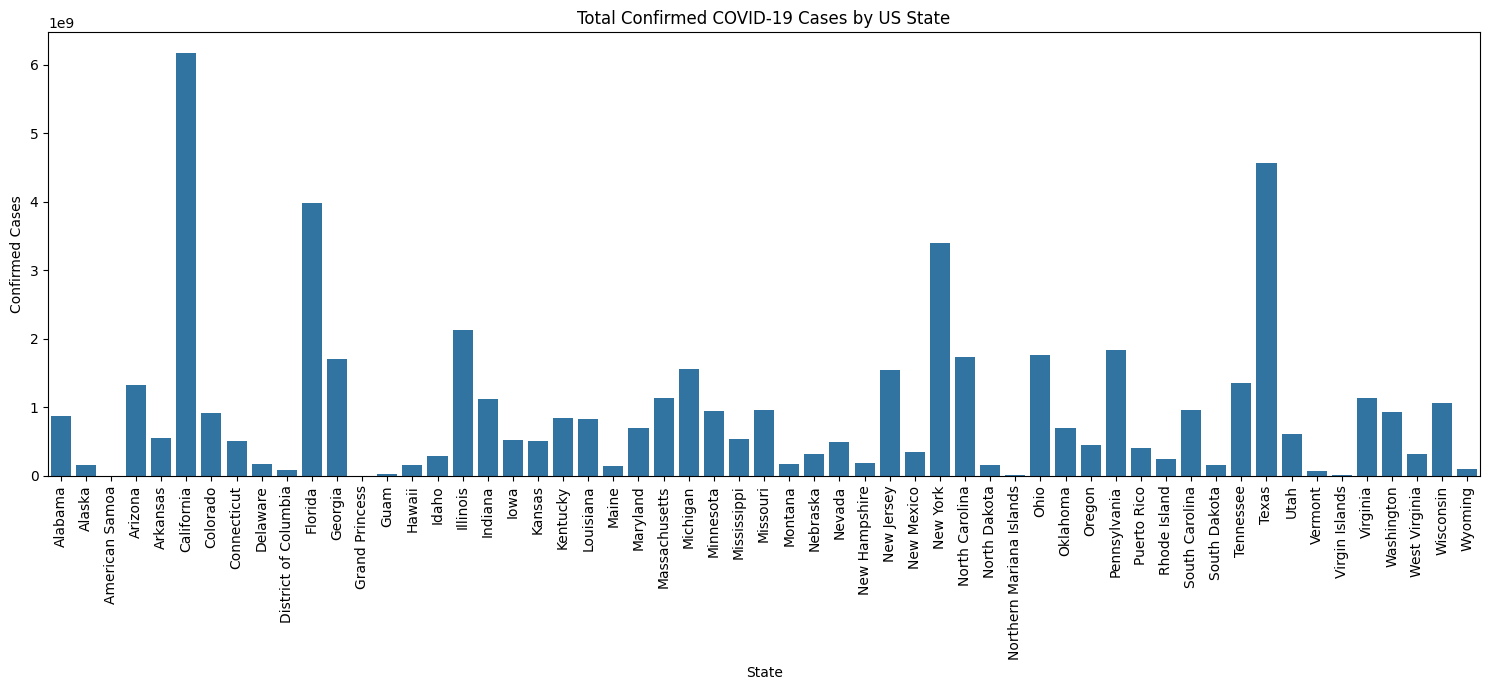

In [55]:
plt.figure(figsize=(15, 7))
sns.barplot(data=state_cases_deaths, x='Province_State', y='Confirmed')
plt.title('Total Confirmed COVID-19 Cases by US State')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

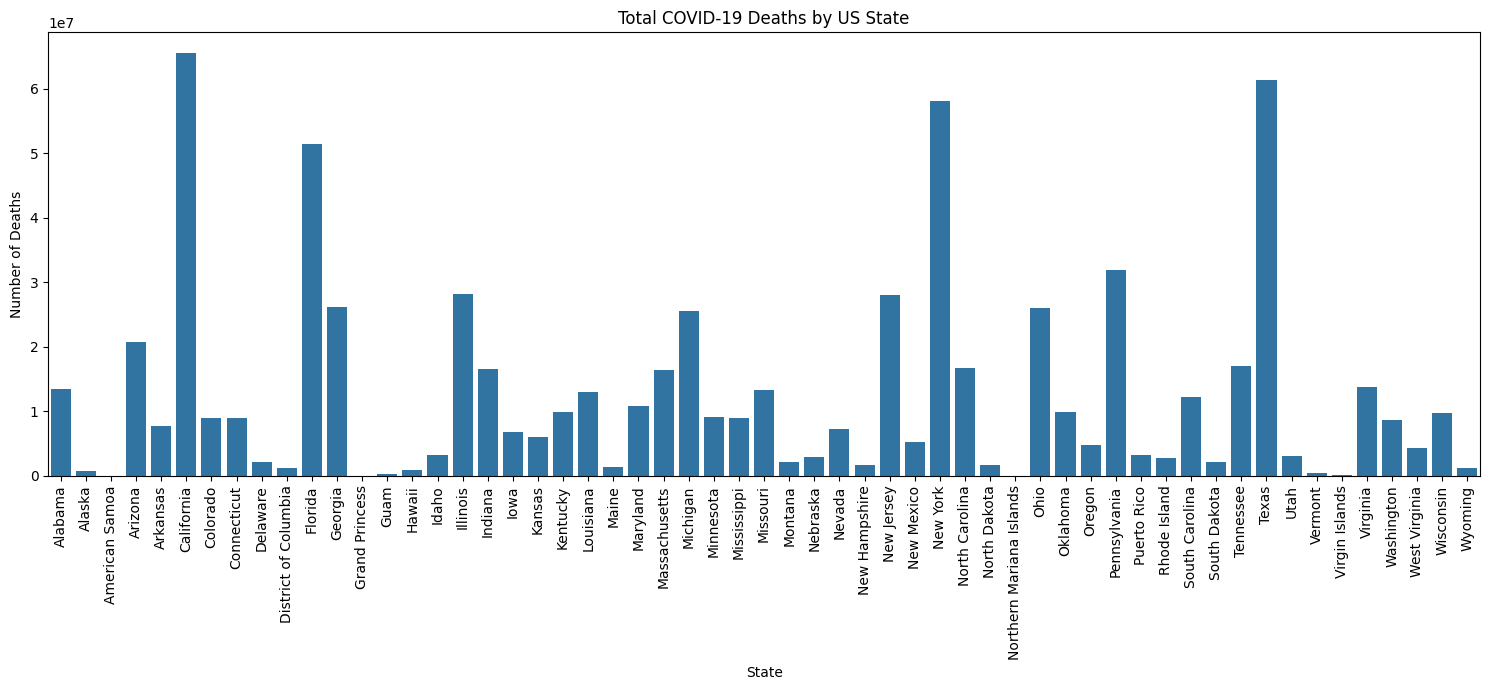

In [56]:
plt.figure(figsize=(15, 7))
sns.barplot(data=state_cases_deaths, x='Province_State', y='Deaths')
plt.title('Total COVID-19 Deaths by US State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [57]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkayalan/vaccinations-in-united-states")

print("Path to dataset files:", path)

pathi = kagglehub.dataset_download("shahriarkabir/average-income-and-rent-in-united-states")

print("Path to dataset files:", pathi)

Path to dataset files: /kaggle/input/vaccinations-in-united-states
Path to dataset files: /kaggle/input/average-income-and-rent-in-united-states


In [58]:
import os

vaccinations_file = os.path.join(path, 'us_state_vaccinations.csv')
income_rent_file = os.path.join(pathi, 'Average Income and Rent in United States.csv')

df_vaccinations = pd.read_csv(vaccinations_file)
df_income_rent = pd.read_csv(income_rent_file)

In [60]:
print("Columns of df_income_rent:", df_income_rent.columns)
print("Columns of df_vaccinations:", df_vaccinations.columns)

Columns of df_income_rent: Index(['Region', 'Average_Rent', 'Average_Income'], dtype='object')
Columns of df_vaccinations: Index(['date;location;total_vaccinations;total_distributed;people_vaccinated;people_fully_vaccinated_per_hundred;total_vaccinations_per_hundred;people_fully_vaccinated;people_vaccinated_per_hundred;distributed_per_hundred;daily_vaccinations_raw;daily_vaccinations;daily_vaccinations_per_million;share_doses_used;total_boosters;total_boosters_per_hundred'], dtype='object')


In [61]:
display(df_vaccinations.head())

,date;location;total_vaccinations;total_distributed;people_vaccinated;people_fully_vaccinated_per_hundred;total_vaccinations_per_hundred;people_fully_vaccinated;people_vaccinated_per_hundred;distributed_per_hundred;daily_vaccinations_raw;daily_vaccinations;daily_vaccinations_per_million;share_doses_used;total_boosters;total_boosters_per_hundred
0,12.01.2021;Alabama;78134.0;377025.0;70861.0;0....
1,13.01.2021;Alabama;84040.0;378975.0;74792.0;0....
2,14.01.2021;Alabama;92300.0;435350.0;80480.0;;3...
3,15.01.2021;Alabama;100567.0;444650.0;86956.0;0...
4,16.01.2021;Alabama;;;;;;;;;;7498.0;1529.0;;;


In [62]:
df_vaccinations = pd.read_csv('/kaggle/input/vaccinations-in-united-states/us_state_vaccinations.csv', delimiter=';')
print("Columns of df_income_rent:", df_income_rent.columns)
print("Columns of df_vaccinations:", df_vaccinations.columns)

Columns of df_income_rent: Index(['Region', 'Average_Rent', 'Average_Income'], dtype='object')
Columns of df_vaccinations: Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')


In [63]:
df_income_rent.rename(columns={'Region': 'Province_State'}, inplace=True)
df_vaccinations.rename(columns={'location': 'Province_State'}, inplace=True)

df_vaccinations['Province_State'] = df_vaccinations['Province_State'].replace('New York State', 'New York')

df_income_rent['Average_Rent'] = df_income_rent['Average_Rent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_income_rent['Average_Income'] = df_income_rent['Average_Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

df_income_rent = df_income_rent[['Province_State', 'Average_Rent', 'Average_Income']]
df_vaccinations = df_vaccinations[['Province_State', 'total_vaccinations', 'people_vaccinated']]

display(df_income_rent.head())
display(df_vaccinations.head())

,Province_State,Average_Rent,Average_Income
0,Alabama,829.0,50637.0
1,Alaska,1313.0,68919.0
2,Arizona,1126.0,56667.0
3,Arkansas,752.0,51787.0
4,California,1677.0,77339.0


,Province_State,total_vaccinations,people_vaccinated
0,Alabama,78134.0,70861.0
1,Alabama,84040.0,74792.0
2,Alabama,92300.0,80480.0
3,Alabama,100567.0,86956.0
4,Alabama,NaN,NaN


In [64]:
print("Unique states in df_income_rent:", df_income_rent['Province_State'].unique())
print("Unique states in df_vaccinations:", df_vaccinations['Province_State'].unique())

Unique states in df_income_rent: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Unique states in df_vaccinations: ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas'
 'Bureau of Prisons' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'Dept of Defense' 'District of Columbia' 'Federated States of Micronesia'
 'Florida' 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois'
 'Indian Health Svc' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Long Term Care'
 'Louisiana' 'Main

In [65]:
import numpy as np

non_states_vaccinations = ['Bureau of Prisons', 'Dept of Defense', 'Federated States of Micronesia',
                           'Indian Health Svc', 'Long Term Care', 'Marshall Islands',
                           'New York State', 'Northern Mariana Islands', 'Puerto Rico',
                           'Republic of Palau', 'United States', 'Veterans Health', 'Virgin Islands', np.nan]
df_vaccinations = df_vaccinations[~df_vaccinations['Province_State'].isin(non_states_vaccinations)].copy()

print("Unique states in df_vaccinations after cleaning:", df_vaccinations['Province_State'].unique())


Unique states in df_vaccinations after cleaning: ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [66]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
usc = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
usd = pd.read_csv(url)

drop = ['Diamond Princess', 'Grand Princess']
usc = usc[~usc['Province_State'].isin(drop)].copy()
usd = usd[~usd['Province_State'].isin(drop)].copy()

non_states = ['American Samoa', 'District of Columbia', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']
usc = usc[~usc['Province_State'].isin(non_states)].copy()
usd = usd[~usd['Province_State'].isin(non_states)].copy()


id_vars = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_']
date_cols = usc.columns.difference(id_vars).tolist()
date_cols.remove('Combined_Key')

usc_melted = usc.melt(
    id_vars=id_vars,
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

usc_melted['Date'] = pd.to_datetime(usc_melted['Date'])

date_cols_d = usd.columns.difference(id_vars).tolist()
date_cols_d.remove('Combined_Key')
date_cols_d.remove('Population')

usd_melted = usd.melt(
    id_vars=id_vars,
    value_vars=date_cols_d,
    var_name='Date',
    value_name='Deaths'
)

usd_melted['Date'] = pd.to_datetime(usd_melted['Date'])

usc_grouped = usc_melted.groupby('Province_State')['Confirmed'].sum().reset_index()
usd_grouped = usd_melted.groupby('Province_State')['Deaths'].sum().reset_index()

merged_us_data = pd.merge(usc_grouped, usd_grouped, on='Province_State')

merged_us_data = pd.merge(merged_us_data, df_income_rent, on='Province_State', how='left')
merged_us_data = pd.merge(merged_us_data, df_vaccinations, on='Province_State', how='left')

display(merged_us_data.head())

,Province_State,Confirmed,Deaths,Average_Rent,Average_Income,total_vaccinations,people_vaccinated
0,Alabama,872756073,13398261,829.0,50637.0,78134.0,70861.0
1,Alabama,872756073,13398261,829.0,50637.0,84040.0,74792.0
2,Alabama,872756073,13398261,829.0,50637.0,92300.0,80480.0
3,Alabama,872756073,13398261,829.0,50637.0,100567.0,86956.0
4,Alabama,872756073,13398261,829.0,50637.0,NaN,NaN


In [67]:
merged_us_data.shape

(20200, 7)

In [72]:
# Calculate the total population for each state by summing the county populations
total_state_population = usd.groupby('Province_State')['Population'].sum().reset_index()
total_state_population.rename(columns={'Population': 'Population'}, inplace=True)
display(total_state_population.head())

,Province_State,Population
0,Alabama,4903185
1,Alaska,740995
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [73]:
merged_us_data_with_population = pd.merge(merged_us_data, total_state_population, on='Province_State', how='left')

latest_date_cases = usc_melted.loc[usc_melted.groupby(['Province_State', 'Admin2'])['Date'].idxmax()]

usc_grouped_latest = latest_date_cases.groupby('Province_State')['Confirmed'].sum().reset_index()
usc_grouped_latest.rename(columns={'Confirmed': 'Confirmed'}, inplace=True)

latest_date_deaths = usd_melted.loc[usd_melted.groupby(['Province_State', 'Admin2'])['Date'].idxmax()]

usd_grouped_latest = latest_date_deaths.groupby('Province_State')['Deaths'].sum().reset_index()
usd_grouped_latest.rename(columns={'Deaths': 'Deaths'}, inplace=True)

aggregated_us_data = pd.merge(usc_grouped_latest, usd_grouped_latest, on='Province_State')

aggregated_us_data = pd.merge(aggregated_us_data, df_income_rent, on='Province_State', how='left')

df_vaccinations_agg = df_vaccinations.groupby('Province_State').agg(
    total_vaccinations=('total_vaccinations', 'sum'),
    people_vaccinated=('people_vaccinated', 'sum')
).reset_index()

aggregated_us_data = pd.merge(aggregated_us_data, df_vaccinations_agg, on='Province_State', how='left')

aggregated_us_data = pd.merge(aggregated_us_data, total_state_population, on='Province_State', how='left')

display(aggregated_us_data.head())

,Province_State,Confirmed,Deaths,Average_Rent,Average_Income,total_vaccinations,people_vaccinated,Population
0,Alabama,1644533,21032,829.0,50637.0,1.324313e+09,7.463239e+08,4903185
1,Alaska,307655,1486,1313.0,68919.0,2.457429e+08,1.284438e+08,740995
2,Arizona,2443514,33102,1126.0,56667.0,2.499018e+09,1.308003e+09,7278717
3,Arkansas,1006883,13020,752.0,51787.0,9.002208e+08,4.959419e+08,3017804
4,California,12129699,101159,1677.0,77339.0,1.285756e+10,7.200049e+09,39512223


In [74]:
us_data = aggregated_us_data

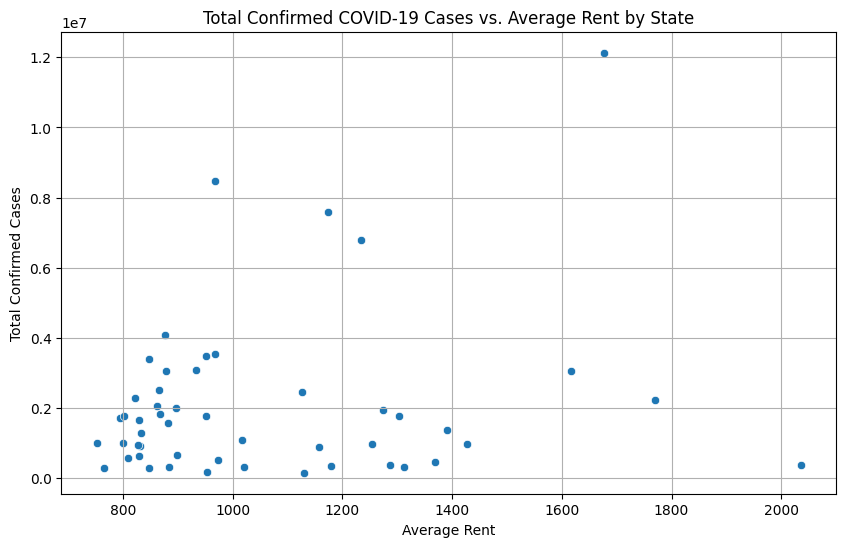

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Average_Rent', y='Confirmed')
plt.title('Total Confirmed COVID-19 Cases vs. Average Rent by State')
plt.xlabel('Average Rent')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()

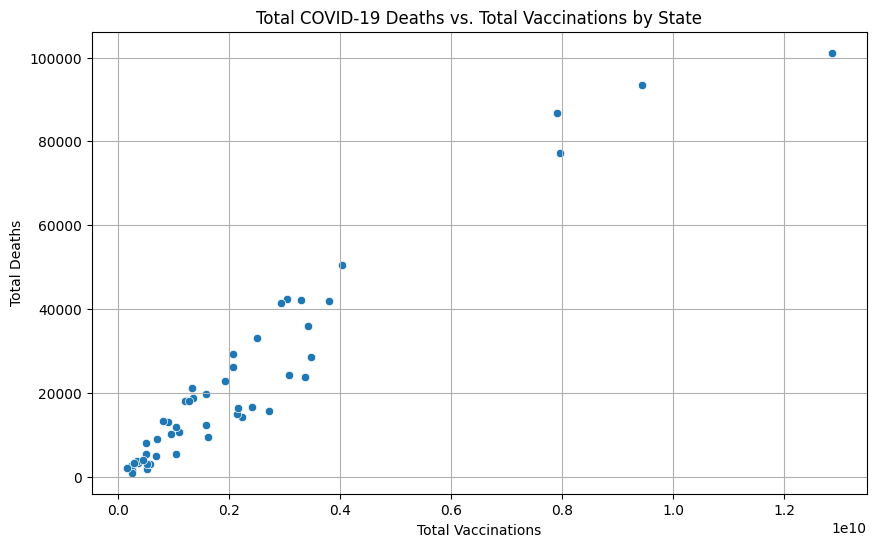

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='total_vaccinations', y='Deaths')
plt.title('Total COVID-19 Deaths vs. Total Vaccinations by State')
plt.xlabel('Total Vaccinations')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

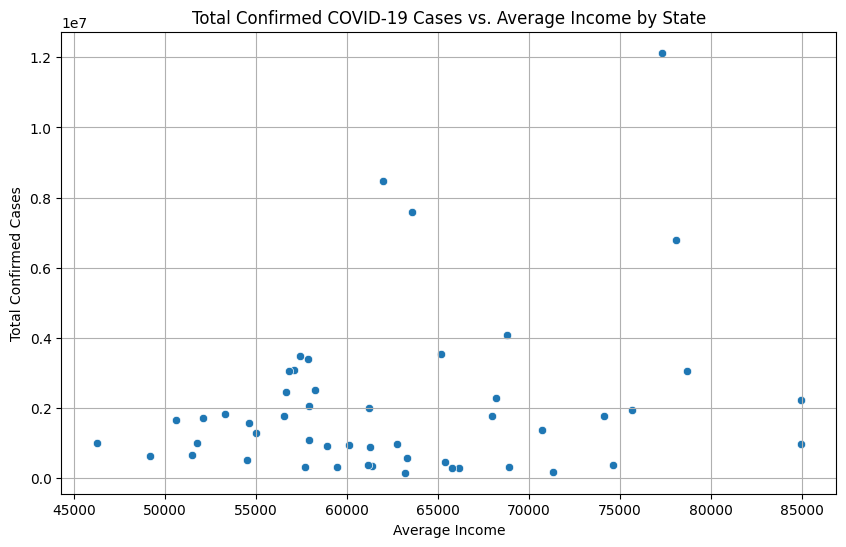

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Average_Income', y='Confirmed')
plt.title('Total Confirmed COVID-19 Cases vs. Average Income by State')
plt.xlabel('Average Income')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()

In [78]:
correlation_matrix = us_data.select_dtypes(include=np.number).corr()
display(correlation_matrix)

,Confirmed,Deaths,Average_Rent,Average_Income,total_vaccinations,people_vaccinated,Population
Confirmed,1.000000,0.972516,0.193676,0.251195,0.986969,0.988131,0.993370
Deaths,0.972516,1.000000,0.123830,0.192360,0.961032,0.957336,0.964228
Average_Rent,0.193676,0.123830,1.000000,0.655307,0.256166,0.264589,0.198225
Average_Income,0.251195,0.192360,0.655307,1.000000,0.329836,0.332141,0.261769
total_vaccinations,0.986969,0.961032,0.256166,0.329836,1.000000,0.999156,0.988530
people_vaccinated,0.988131,0.957336,0.264589,0.332141,0.999156,1.000000,0.990279
Population,0.993370,0.964228,0.198225,0.261769,0.988530,0.990279,1.000000


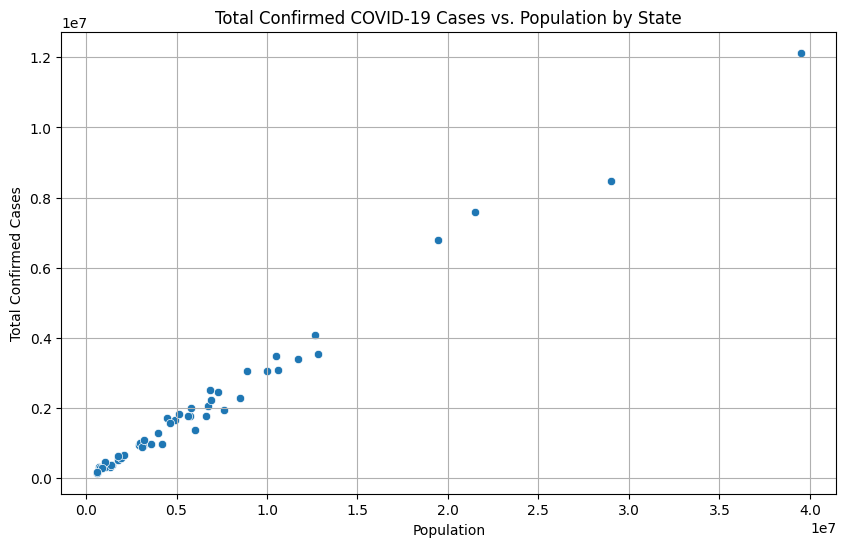

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Population', y='Confirmed')
plt.title('Total Confirmed COVID-19 Cases vs. Population by State')
plt.xlabel('Population')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()

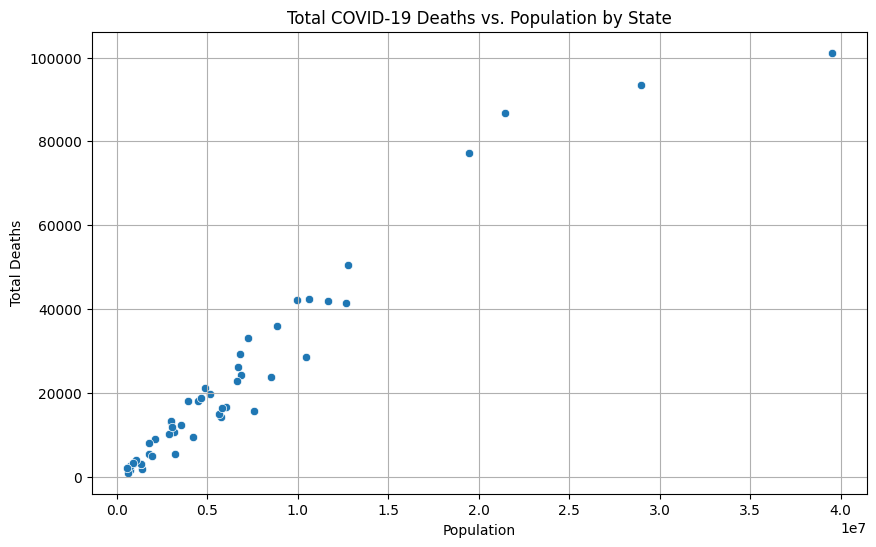

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Population', y='Deaths')
plt.title('Total COVID-19 Deaths vs. Population by State')
plt.xlabel('Population')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

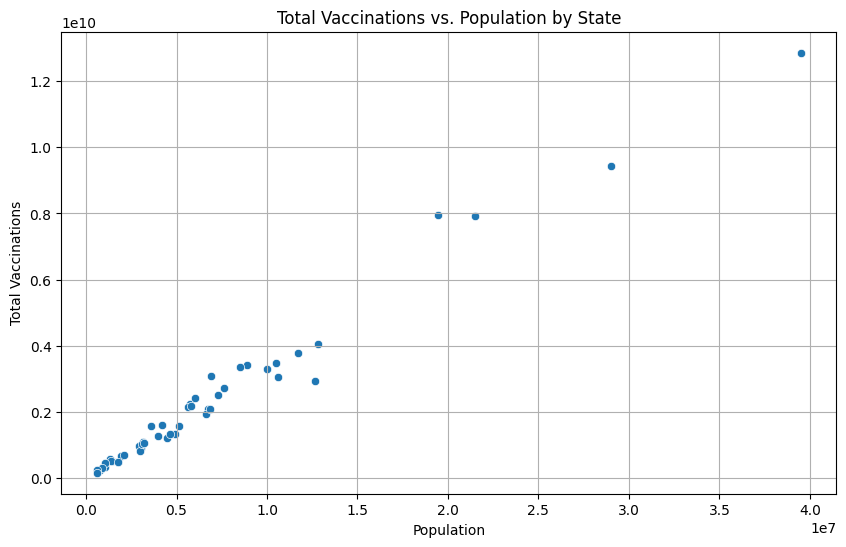

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_us_data, x='Population', y='total_vaccinations')
plt.title('Total Vaccinations vs. Population by State')
plt.xlabel('Population')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.show()

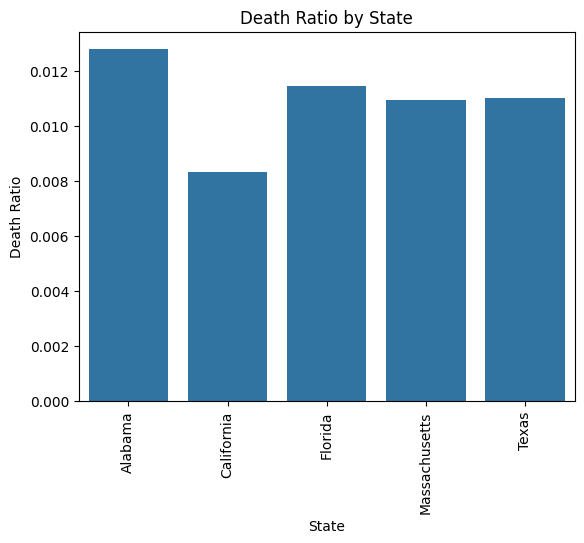

In [82]:
us_data['Death Ratio'] = us_data['Deaths']/us_data['Confirmed']
selected_states = ['Alabama', 'Texas', 'California', 'Florida', 'Massachusetts']

selected_us_data = us_data[us_data['Province_State'].isin(selected_states)]
figsize=(25, 16)

sns.barplot(data=selected_us_data, x='Province_State', y='Death Ratio')
plt.title('Death Ratio by State')
plt.xlabel('State')
plt.ylabel('Death Ratio')
plt.xticks(rotation=90)
plt.show()

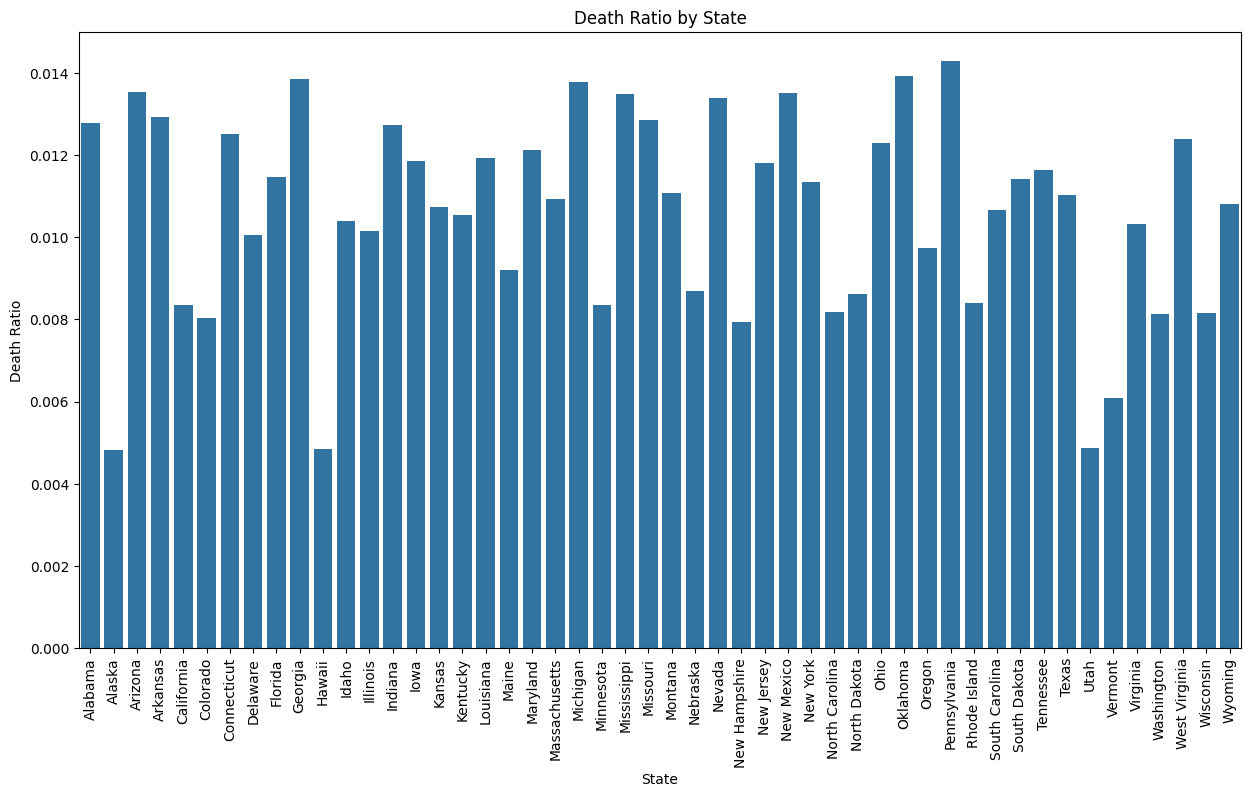

In [83]:
us_data['Death Ratio'] = us_data['Deaths']/us_data['Confirmed']

plt.figure(figsize=(15, 8))
sns.barplot(data=us_data, x='Province_State', y='Death Ratio')
plt.title('Death Ratio by State')
plt.xlabel('State')
plt.ylabel('Death Ratio')
plt.xticks(rotation=90)
plt.show()

In [84]:
us_data['Confirmed per Capita'] = us_data['Confirmed'] / us_data['Population']

us_data['Deaths per Capita'] = us_data['Deaths'] / us_data['Population']

us_data['Vaccinations per Capita'] = us_data['total_vaccinations'] / us_data['Population']

us_data['Death Ratio'] = us_data['Deaths'] / us_data['Confirmed']

us_data['Confirmed per Capita'] = us_data['Confirmed per Capita'].replace([np.inf, -np.inf], np.nan).fillna(0)
us_data['Deaths per Capita'] = us_data['Deaths per Capita'].replace([np.inf, -np.inf], np.nan).fillna(0)
us_data['Vaccinations per Capita'] = us_data['Vaccinations per Capita'].replace([np.inf, -np.inf], np.nan).fillna(0)
us_data['Death Ratio'] = us_data['Death Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

display(us_data.head())

,Province_State,Confirmed,Deaths,Average_Rent,Average_Income,total_vaccinations,people_vaccinated,Population,Death Ratio,Confirmed per Capita,Deaths per Capita,Vaccinations per Capita
0,Alabama,1644533,21032,829.0,50637.0,1.324313e+09,7.463239e+08,4903185,0.012789,0.335401,0.004289,270.092479
1,Alaska,307655,1486,1313.0,68919.0,2.457429e+08,1.284438e+08,740995,0.004830,0.415192,0.002005,331.639083
2,Arizona,2443514,33102,1126.0,56667.0,2.499018e+09,1.308003e+09,7278717,0.013547,0.335707,0.004548,343.332270
3,Arkansas,1006883,13020,752.0,51787.0,9.002208e+08,4.959419e+08,3017804,0.012931,0.333648,0.004314,298.303253
4,California,12129699,101159,1677.0,77339.0,1.285756e+10,7.200049e+09,39512223,0.008340,0.306986,0.002560,325.407251


In [85]:
us_data['Confirmed per Capita'] = us_data['Confirmed'] / us_data['Population']

us_data['Deaths per Capita'] = us_data['Deaths'] / us_data['Population']

us_data['Vaccinations per Capita'] = us_data['total_vaccinations'] / us_data['Population']

us_data['Death Ratio'] = us_data['Deaths'] / us_data['Confirmed']

us_data['Confirmed per Capita'] = us_data['Confirmed per Capita'].replace([np.inf, -np.inf], np.nan).fillna(0)
us_data['Deaths per Capita'] = us_data['Deaths per Capita'].replace([np.inf, -np.inf], np.nan).fillna(0)
us_data['Vaccinations per Capita'] = us_data['Vaccinations per Capita'].replace([np.inf, -np.inf], np.nan).fillna(0)
us_data['Death Ratio'] = us_data['Death Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

display(us_data.head())

,Province_State,Confirmed,Deaths,Average_Rent,Average_Income,total_vaccinations,people_vaccinated,Population,Death Ratio,Confirmed per Capita,Deaths per Capita,Vaccinations per Capita
0,Alabama,1644533,21032,829.0,50637.0,1.324313e+09,7.463239e+08,4903185,0.012789,0.335401,0.004289,270.092479
1,Alaska,307655,1486,1313.0,68919.0,2.457429e+08,1.284438e+08,740995,0.004830,0.415192,0.002005,331.639083
2,Arizona,2443514,33102,1126.0,56667.0,2.499018e+09,1.308003e+09,7278717,0.013547,0.335707,0.004548,343.332270
3,Arkansas,1006883,13020,752.0,51787.0,9.002208e+08,4.959419e+08,3017804,0.012931,0.333648,0.004314,298.303253
4,California,12129699,101159,1677.0,77339.0,1.285756e+10,7.200049e+09,39512223,0.008340,0.306986,0.002560,325.407251


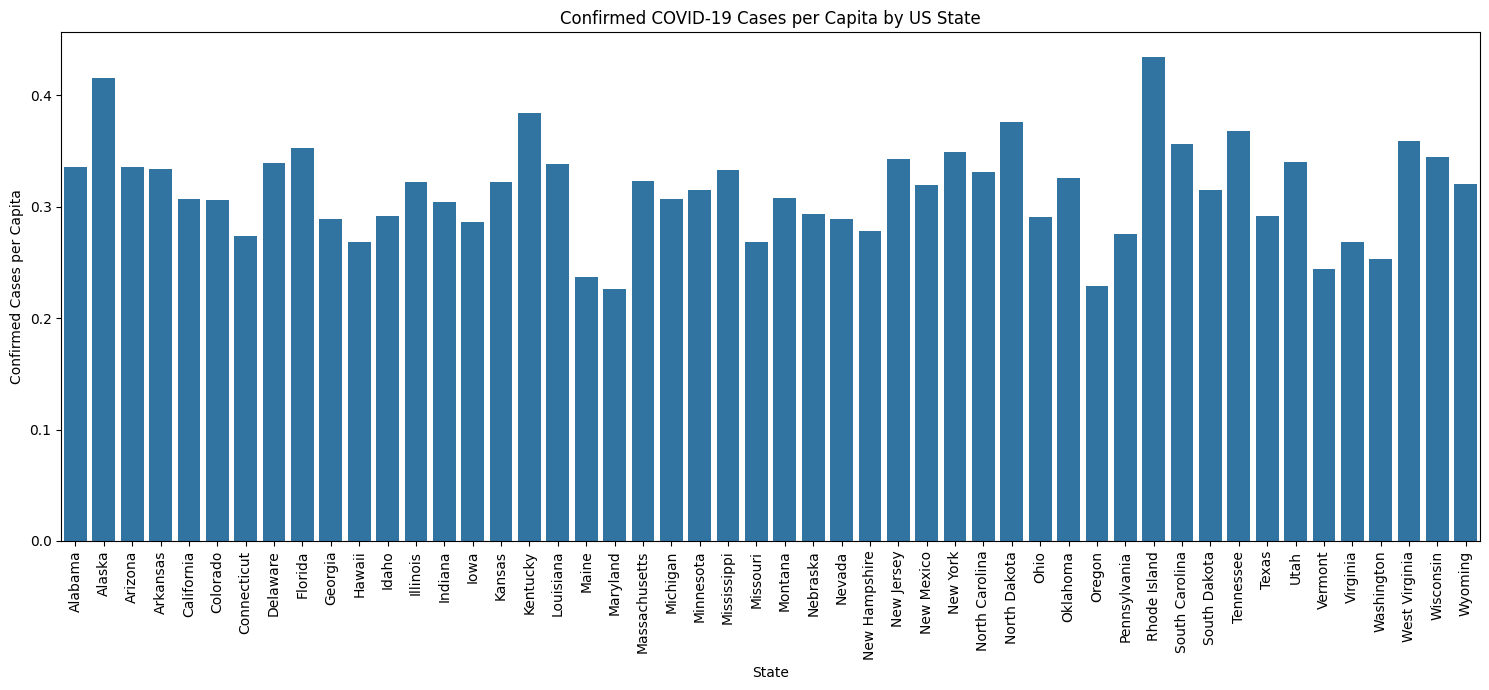

In [86]:
plt.figure(figsize=(15, 7))
sns.barplot(data=us_data, x='Province_State', y='Confirmed per Capita')
plt.title('Confirmed COVID-19 Cases per Capita by US State')
plt.xlabel('State')
plt.ylabel('Confirmed Cases per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

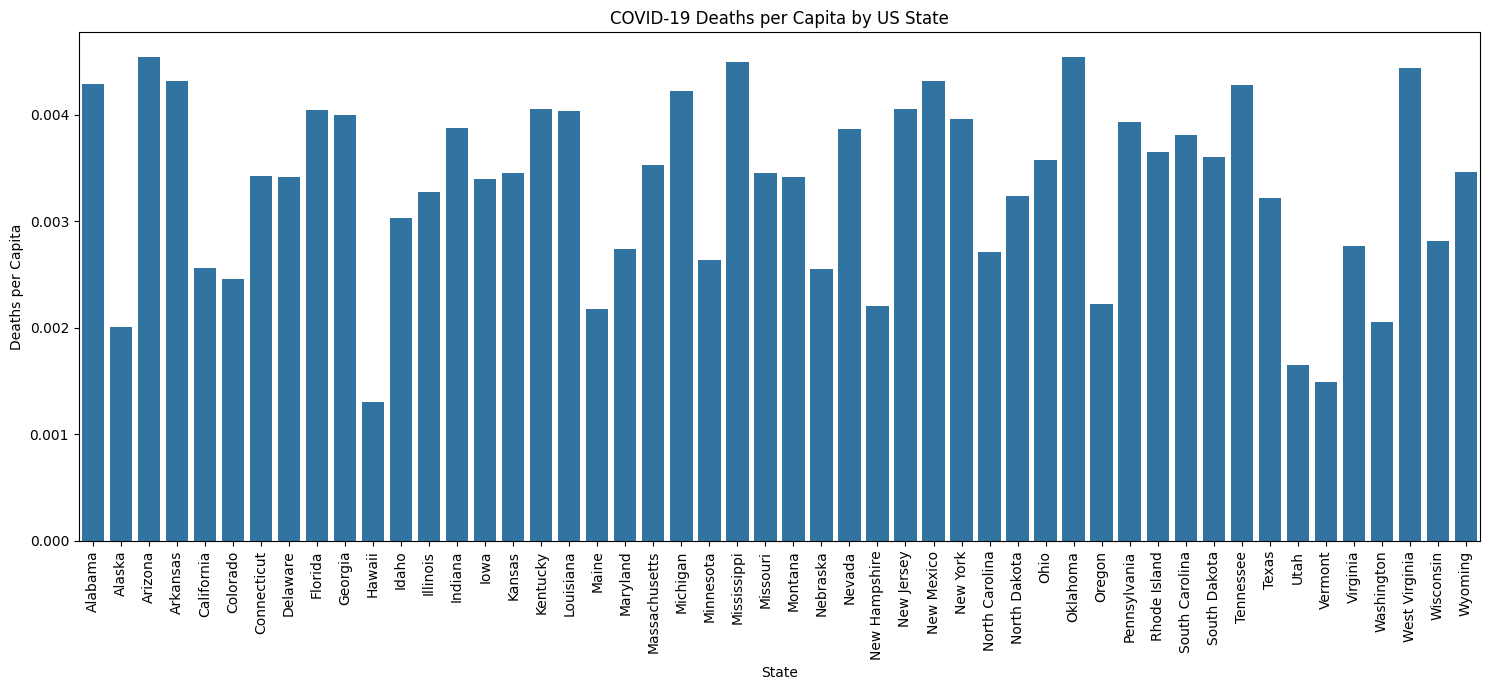

In [87]:
plt.figure(figsize=(15, 7))
sns.barplot(data=us_data, x='Province_State', y='Deaths per Capita')
plt.title('COVID-19 Deaths per Capita by US State')
plt.xlabel('State')
plt.ylabel('Deaths per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

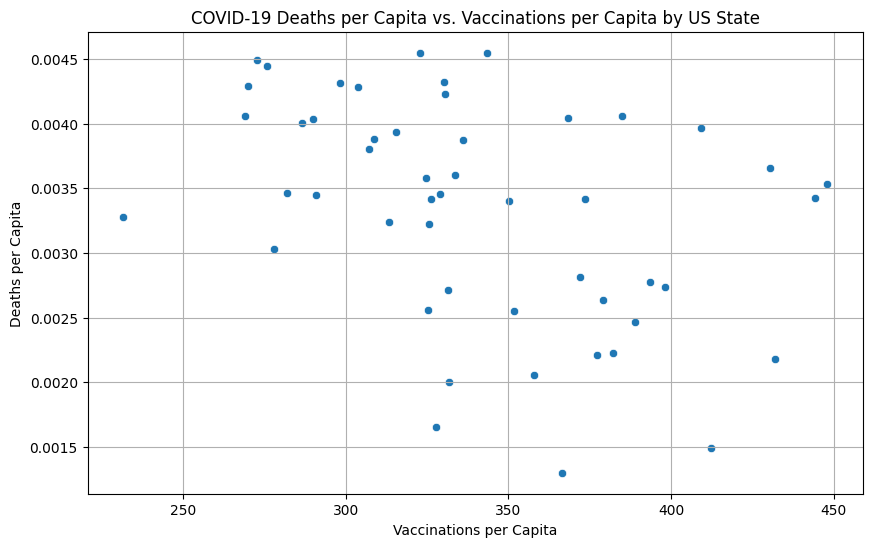

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Vaccinations per Capita', y='Deaths per Capita')
plt.title('COVID-19 Deaths per Capita vs. Vaccinations per Capita by US State')
plt.xlabel('Vaccinations per Capita')
plt.ylabel('Deaths per Capita')
plt.grid(True)
plt.show()

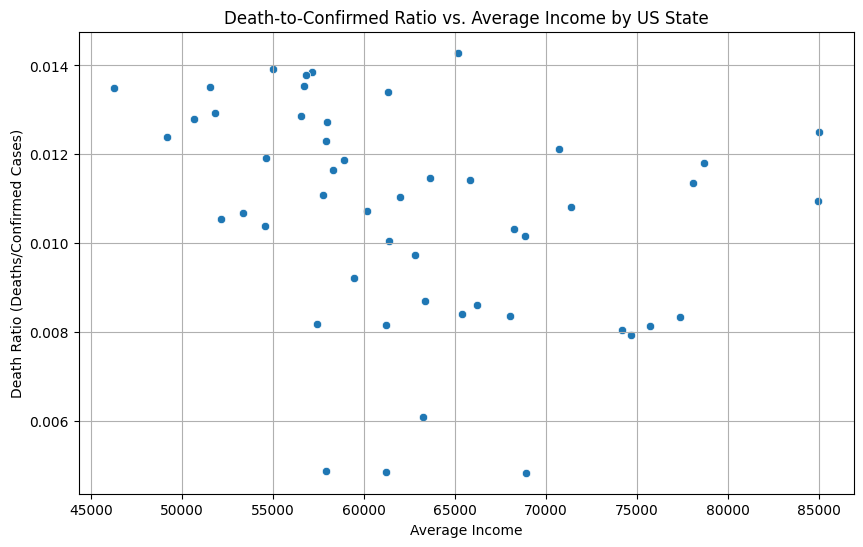

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Average_Income', y='Death Ratio')
plt.title('Death-to-Confirmed Ratio vs. Average Income by US State')
plt.xlabel('Average Income')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.grid(True)
plt.show()

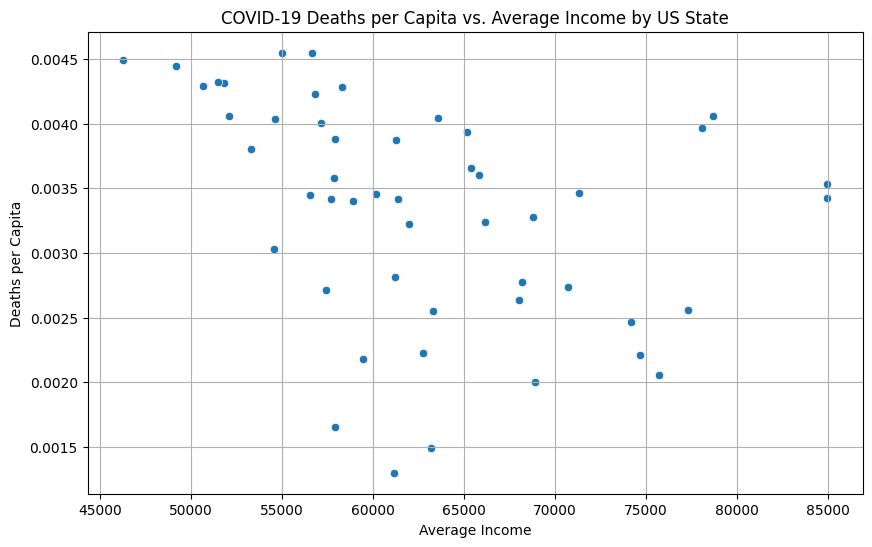

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Average_Income', y='Deaths per Capita')
plt.title('COVID-19 Deaths per Capita vs. Average Income by US State')
plt.xlabel('Average Income')
plt.ylabel('Deaths per Capita')
plt.grid(True)
plt.show()

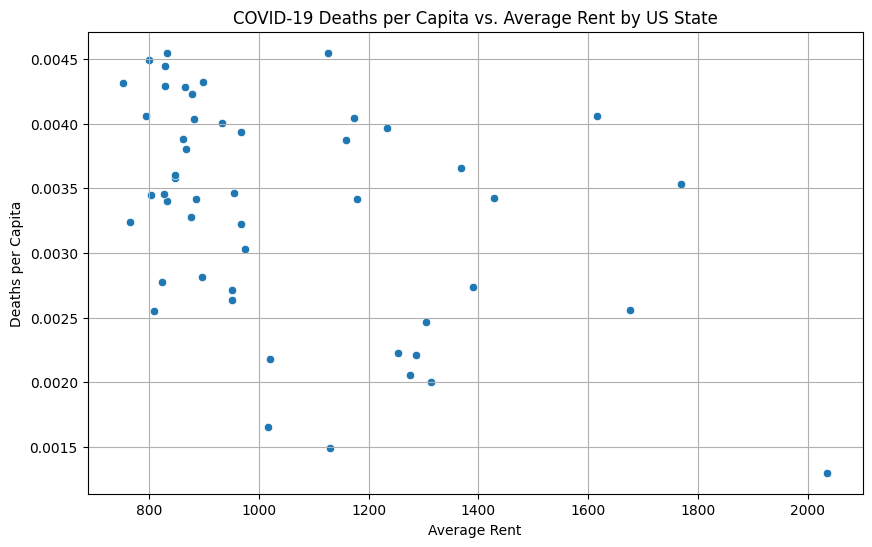

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_data, x='Average_Rent', y='Deaths per Capita')
plt.title('COVID-19 Deaths per Capita vs. Average Rent by US State')
plt.xlabel('Average Rent')
plt.ylabel('Deaths per Capita')
plt.grid(True)
plt.show()

In [91]:
print("Unique states in df_income_rent:", df_income_rent['Province_State'].unique())
print("Unique states in df_vaccinations_agg:", df_vaccinations_agg['Province_State'].unique())

Unique states in df_income_rent: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Unique states in df_vaccinations_agg: ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevad

In [92]:
us_data.columns

Index(['Province_State', 'Confirmed', 'Deaths', 'Average_Rent',
       'Average_Income', 'total_vaccinations', 'people_vaccinated',
       'Population', 'Death Ratio', 'Confirmed per Capita',
       'Deaths per Capita', 'Vaccinations per Capita'],
      dtype='object')

In [93]:
X = us_data.drop(columns=['Death Ratio', 'Province_State', 'Confirmed', 'Deaths', 'total_vaccinations', 'people_vaccinated'])
y = us_data['Death Ratio']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
X = us_data[['Average_Rent', 'Average_Income', 'Population', 'Confirmed per Capita', 'Deaths per Capita', 'Vaccinations per Capita']]
y = us_data['Death Ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")
correlation_coefficient = np.corrcoef(y_test, y_pred_linear)[0, 1]

print(f"Pearson Correlation Coefficient (r-value): {correlation_coefficient}")

Linear Regression Mean Squared Error: 1.0160320109638103e-07
Linear Regression R-squared: 0.9687812733281512
Pearson Correlation Coefficient (r-value): 0.9855757181611123


In [97]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression Mean Squared Error: 4.699713191494506e-06
Ridge Regression R-squared: -0.44403975443816135


In [98]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression R-squared: {r2_lasso}")

Lasso Regression Mean Squared Error: 3.277592067361291e-06
Lasso Regression R-squared: -0.00707703880027255


In [99]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R-squared: {r2_rf}")

Random Forest Regressor Mean Squared Error: 2.063259149430467e-06
Random Forest Regressor R-squared: 0.36604041266220233


In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regressor R-squared: {r2_dt}")

Decision Tree Regressor Mean Squared Error: 3.923678189751657e-06
Decision Tree Regressor R-squared: -0.20559426900295263


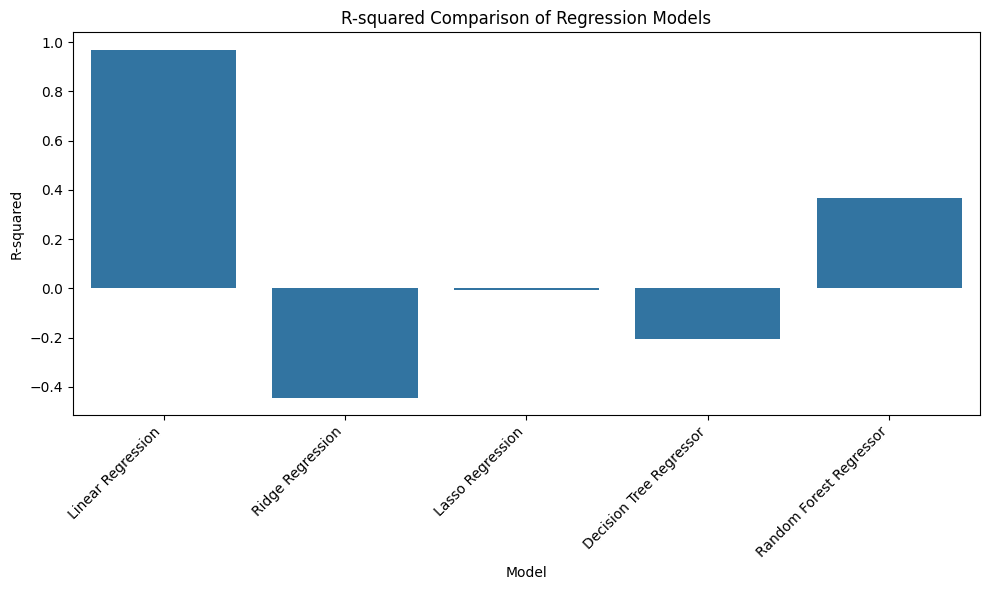

In [101]:
r2_scores = {
    'Linear Regression': r2_linear,
    'Ridge Regression': r2_ridge,
    'Lasso Regression': r2_lasso,
    'Decision Tree Regressor': r2_dt,
    'Random Forest Regressor': r2_rf}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.title('R-squared Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

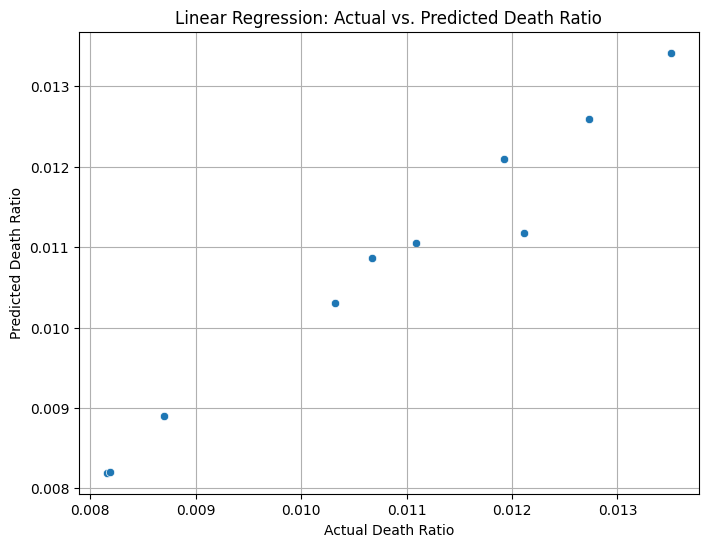

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual Death Ratio")
plt.ylabel("Predicted Death Ratio")
plt.title("Linear Regression: Actual vs. Predicted Death Ratio")
plt.grid(True)
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = us_data[['Average_Rent', 'Average_Income', 'Population', 'Confirmed per Capita', 'Deaths per Capita', 'Vaccinations per Capita']]
y = us_data['Death Ratio']

all_y_test = []
all_y_pred_linear = []

num_splits = 10
for i in range(num_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    y_pred_linear = linear_model.predict(X_test)

    all_y_test.extend(y_test)
    all_y_pred_linear.extend(y_pred_linear)

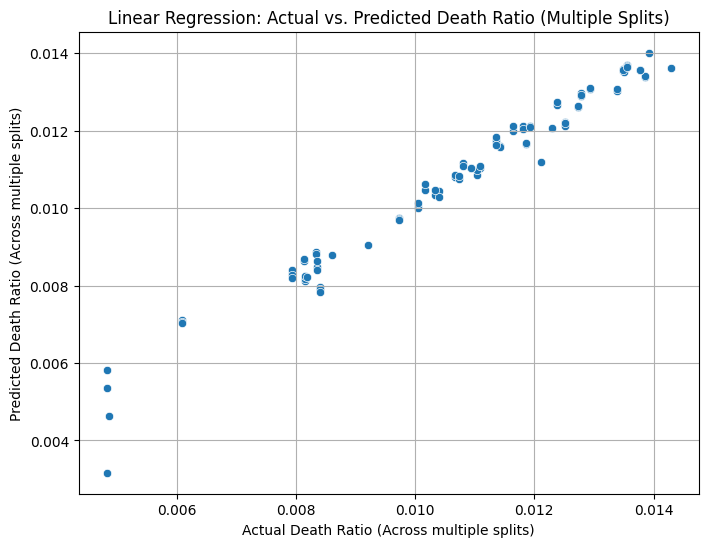

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=all_y_test, y=all_y_pred_linear)
plt.xlabel("Actual Death Ratio (Across multiple splits)")
plt.ylabel("Predicted Death Ratio (Across multiple splits)")
plt.title("Linear Regression: Actual vs. Predicted Death Ratio (Multiple Splits)")
plt.grid(True)
plt.show()

In [133]:
X = us_data[['Average_Income']]
y = us_data['Deaths per Capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")
correlation_coefficient = np.corrcoef(y_test, y_pred_linear)[0, 1]

print(f"Pearson Correlation Coefficient (r-value): {correlation_coefficient}")

Linear Regression Mean Squared Error: 2.6817254925848606e-07
Linear Regression R-squared: 0.3179586102719839
Pearson Correlation Coefficient (r-value): 0.7866297196071146


In [132]:
X = us_data[['Vaccinations per Capita']]
y = us_data['Deaths per Capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")
correlation_coefficient = np.corrcoef(y_test, y_pred_linear)[0, 1]

print(f"Pearson Correlation Coefficient (r-value): {correlation_coefficient}")


Linear Regression Mean Squared Error: 2.3853796272976503e-07
Linear Regression R-squared: 0.39332804922444764
Pearson Correlation Coefficient (r-value): 0.7428650316637058


In [113]:
vaccination_percentile_50 = us_data['Vaccinations per Capita'].quantile(0.5)

rent_income_percentile_50 = us_data['Rent_Income_Ratio'].quantile(0.5)

print(f"50th percentile for Vaccinations per Capita: {vaccination_percentile_50}")
print(f"50th percentile for Rent-to-Income Ratio: {rent_income_percentile_50}")

50th percentile for Vaccinations per Capita: 331.0289011560018
50th percentile for Rent-to-Income Ratio: 0.01635144419316518


In [125]:
# Categorize states by percentile
us_data['Vaccination_Percentile_Category'] = us_data['Vaccinations per Capita'].apply(
    lambda x: 'Top 50%' if x >= vaccination_percentile_50 else 'Bottom 50%'
)

us_data['Rent_Income_Percentile_Category'] = us_data['Rent_Income_Ratio'].apply(
    lambda x: 'Top 50%' if x >= rent_income_percentile_50 else 'Bottom 50%'
)

display(us_data[['Province_State', 'Vaccinations per Capita', 'Vaccination_Percentile_Category', 'Rent_Income_Ratio', 'Rent_Income_Percentile_Category']].head())

,Province_State,Vaccinations per Capita,Vaccination_Percentile_Category,Rent_Income_Ratio,Rent_Income_Percentile_Category
0,Alabama,270.092479,Bottom 50%,0.016371,Top 50%
1,Alaska,331.639083,Top 50%,0.019051,Top 50%
2,Arizona,343.332270,Top 50%,0.019870,Top 50%
3,Arkansas,298.303253,Bottom 50%,0.014521,Bottom 50%
4,California,325.407251,Bottom 50%,0.021684,Top 50%


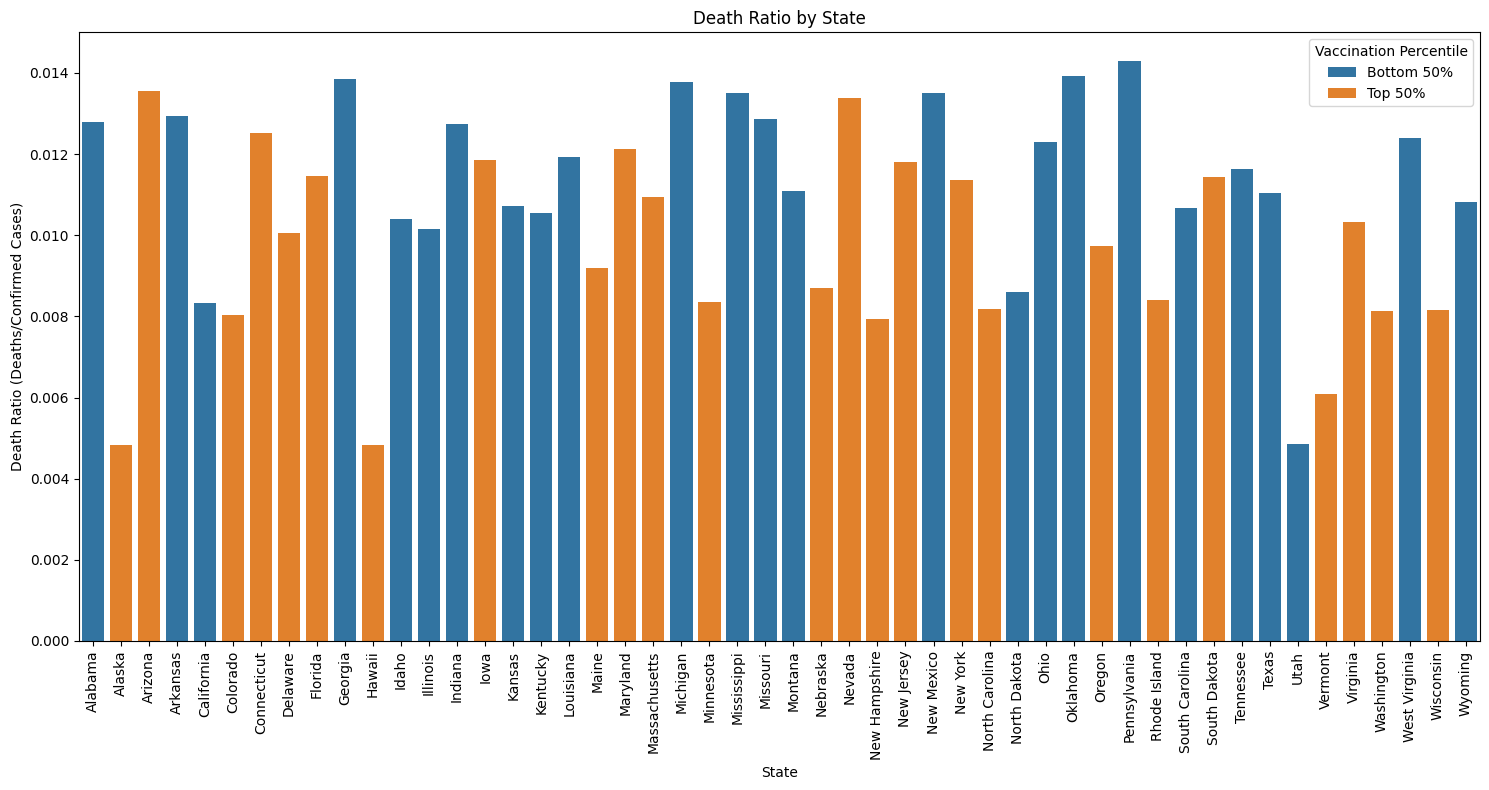

In [117]:
plt.figure(figsize=(15, 8))
sns.barplot(data=us_data, x='Province_State', y='Death Ratio', hue='Vaccination_Percentile_Category', dodge=False)
plt.title('Death Ratio by State')
plt.xlabel('State')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.xticks(rotation=90)
plt.legend(title='Vaccination Percentile')
plt.tight_layout()
plt.show()

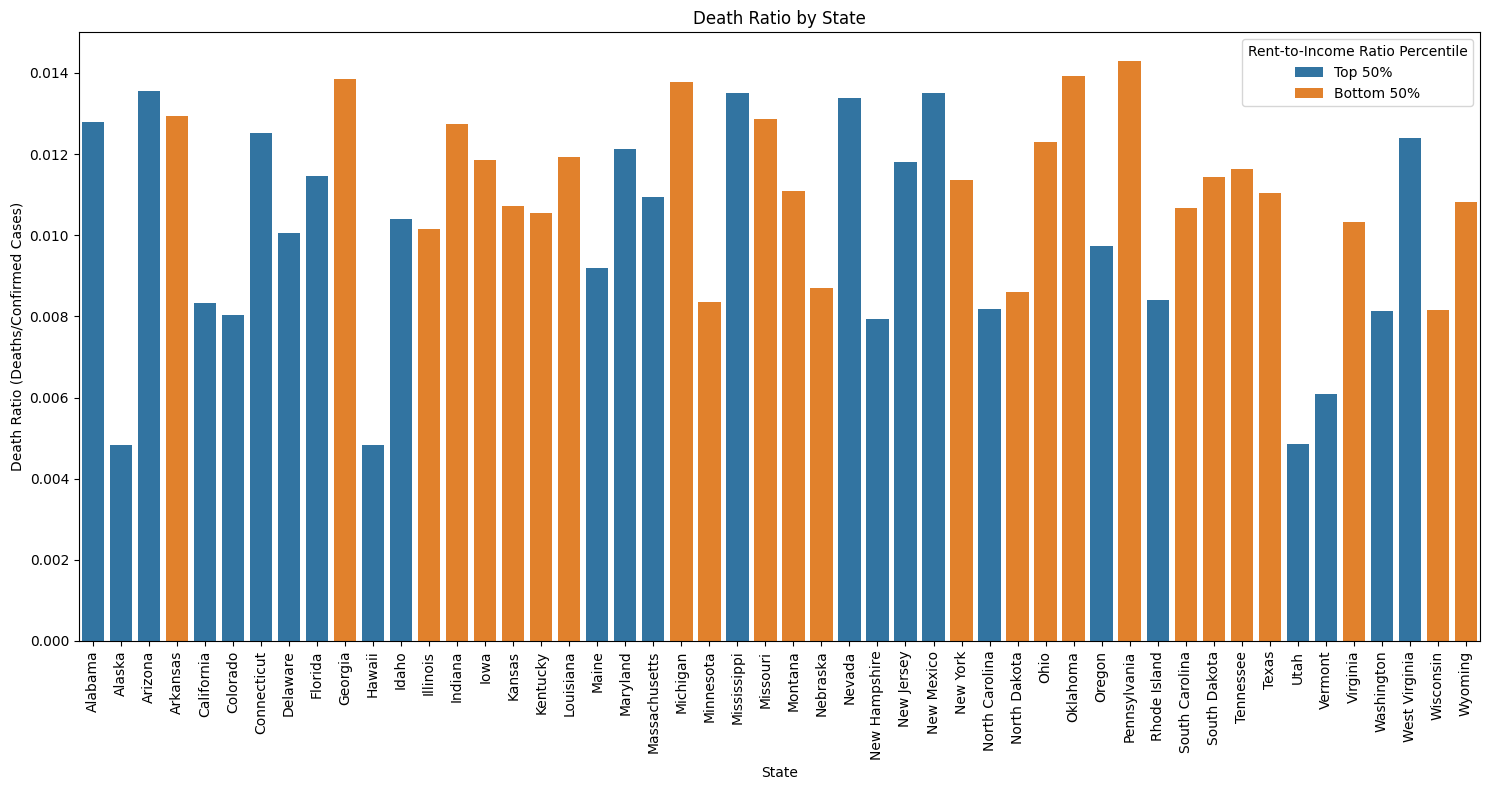

In [118]:
plt.figure(figsize=(15, 8))
sns.barplot(data=us_data, x='Province_State', y='Death Ratio', hue='Rent_Income_Percentile_Category', dodge=False)
plt.title('Death Ratio by State')
plt.xlabel('State')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.xticks(rotation=90)
plt.legend(title='Rent-to-Income Ratio Percentile')
plt.tight_layout()
plt.show()